# COVID-19 Status (Colombia)

### Importar librerias

In [1]:
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

### Importar dataset - Datos abiertos COVID-19 (Colombia)

In [2]:
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())

### Ajuste de datos

In [3]:
#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Fecha de reporte web', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Tipo', 'País de procedencia', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/20), height+3, int(height), fontsize=11, color='dimgrey', rotation=60)

In [4]:
#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

### Habilitar Librerías de gráficos

In [5]:
%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos COVID-19 (Colombia)

In [6]:
data

,Fecha de diagnóstico,Fecha de notificación,Fecha de inicio de síntomas,Fecha de recuperación,Fecha de defunción,Fecha de reporte web,Ciudad de ubicación,Departamento,Severidad,Estado,Edad,Clasificación de edad,Sexo,Tipo,País de procedencia,Código DIVIPOLA
Id de caso,,,,,,,,,,,,,,,,
1,2020-03-06,2020-03-02,2020-02-27 00:00:00,2020-03-13 00:00:00,- -,2020-03-06,Bogotá d.c.,Bogotá D.C.,Leve,Recuperado,19,10 - 20,F,Importado,Italia,11001
2,2020-03-09,2020-03-06,2020-03-04 00:00:00,2020-03-19 00:00:00,- -,2020-03-09,Guadalajara de buga,Valle del Cauca,Leve,Recuperado,34,30 - 40,M,Importado,España,76111
3,2020-03-09,2020-03-07,2020-02-29 00:00:00,2020-03-15 00:00:00,- -,2020-03-09,Medellín,Antioquia,Leve,Recuperado,50,40 - 50,F,Importado,España,5001
4,2020-03-11,2020-03-09,2020-03-06 00:00:00,2020-03-26 00:00:00,- -,2020-03-11,Medellín,Antioquia,Leve,Recuperado,55,50 - 60,M,Relacionado,Colombia,5001
5,2020-03-11,2020-03-09,2020-03-08 00:00:00,2020-03-23 00:00:00,- -,2020-03-11,Medellín,Antioquia,Leve,Recuperado,25,20 - 30,M,Relacionado,Colombia,5001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6503,2020-04-29,2020-04-06,2020-03-30 00:00:00,- -,- -,2020-04-30,Bogotá d.c.,Bogotá D.C.,Leve,Casa,58,50 - 60,F,En estudio,Colombia,11001
6504,2020-04-29,2020-04-06,2020-04-06 00:00:00,- -,- -,2020-04-30,Bogotá d.c.,Bogotá D.C.,Leve,Casa,49,40 - 50,F,En estudio,Colombia,11001
6505,2020-04-28,2020-04-18,2020-04-08 00:00:00,- -,- -,2020-04-30,Bogotá d.c.,Bogotá D.C.,Leve,Casa,30,20 - 30,F,En estudio,Colombia,11001


### - Mapa de influencia - COVID-19 (Colombia)

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Amazonas,46.0,58.0
Antioquia,246.0,226.0
Archipiélago de San Andrés Providencia y Santa Catalina,0.0,6.0
Atlántico,66.0,80.0
Barranquilla D.E.,82.0,81.0
Bogotá D.C.,1324.0,1309.0
Bolívar,10.0,13.0
Boyacá,20.0,19.0
Buenaventura D.E.,15.0,14.0


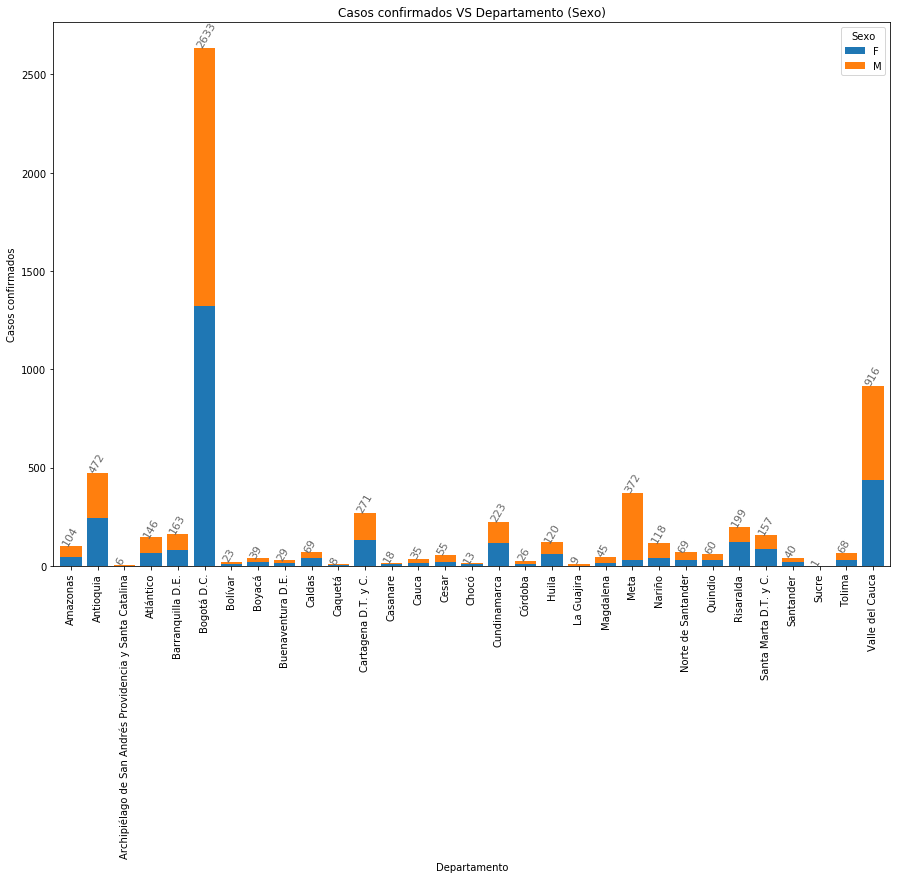

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Amazonas,5,9,25,22,13,15,10,4,1,0
Antioquia,13,23,131,105,61,83,32,12,11,1
Archipiélago de San Andrés Providencia y Santa Catalina,0,0,0,2,3,0,1,0,0,0
Atlántico,14,19,24,22,31,16,10,8,1,1
Barranquilla D.E.,13,18,33,27,25,23,12,7,5,0
Bogotá D.C.,98,170,556,561,412,382,247,145,47,15
Bolívar,0,0,5,6,3,4,2,3,0,0
Boyacá,1,5,6,8,5,4,5,4,1,0
Buenaventura D.E.,0,2,8,5,3,4,4,2,1,0


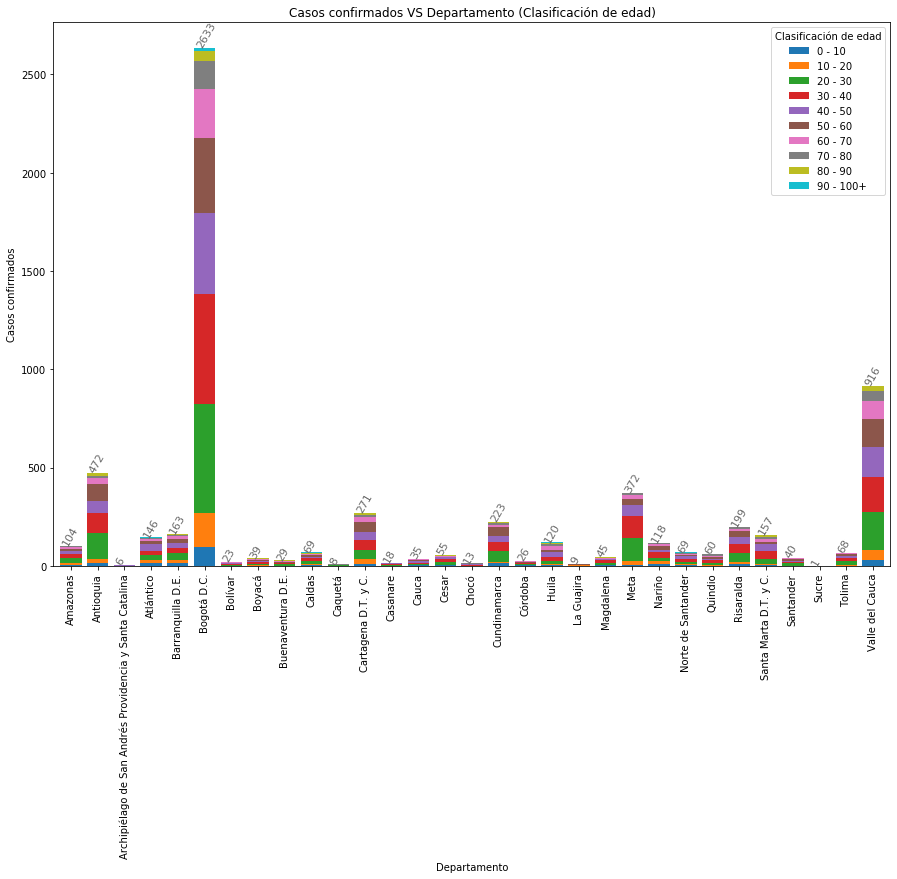

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Departamento,,,,,,
Amazonas,84.0,4.0,16.0,0.0,0.0,0.0
Antioquia,277.0,5.0,8.0,12.0,0.0,170.0
Archipiélago de San Andrés Providencia y Santa Catalina,3.0,0.0,0.0,0.0,0.0,3.0
Atlántico,114.0,4.0,7.0,4.0,0.0,17.0
Barranquilla D.E.,110.0,8.0,5.0,3.0,0.0,37.0
Bogotá D.C.,1819.0,100.0,149.0,36.0,1.0,528.0
Bolívar,16.0,3.0,0.0,1.0,0.0,3.0
Boyacá,21.0,1.0,4.0,0.0,0.0,13.0
Buenaventura D.E.,22.0,1.0,2.0,2.0,0.0,2.0


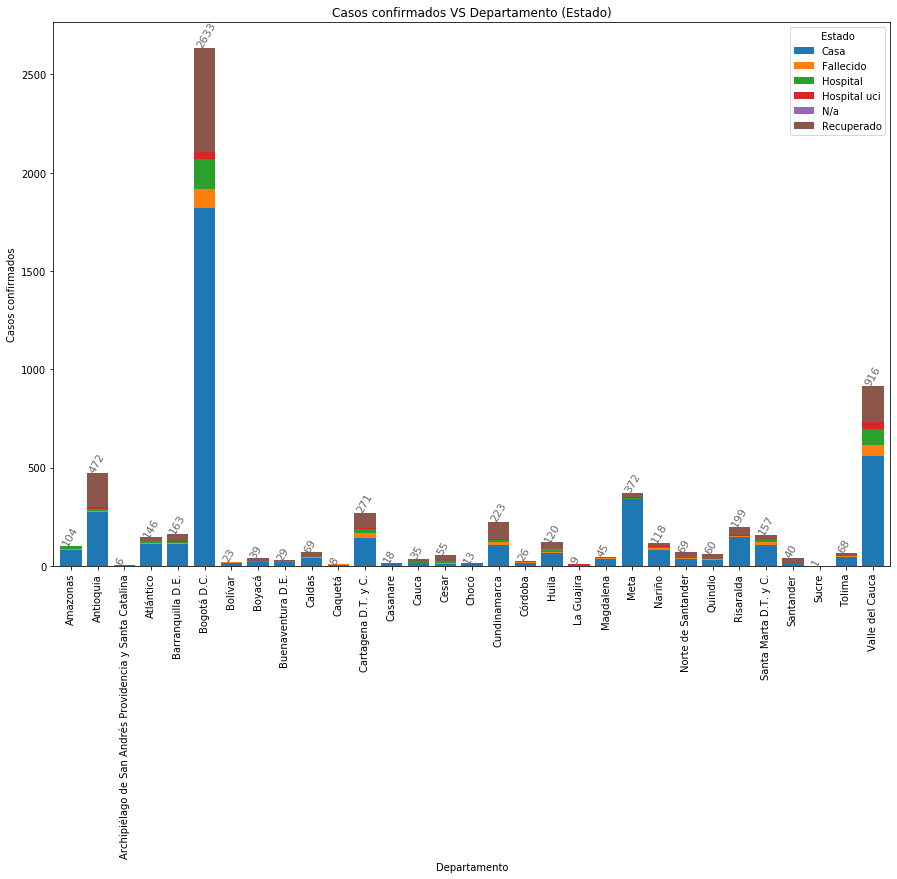

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [14]:
data.groupby([ 'Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,1.0,1.0
2020-03-11,4.0,2.0
2020-03-12,5.0,0.0
2020-03-13,2.0,3.0
2020-03-14,7.0,11.0
2020-03-15,10.0,6.0
2020-03-16,2.0,12.0
2020-03-17,12.0,13.0


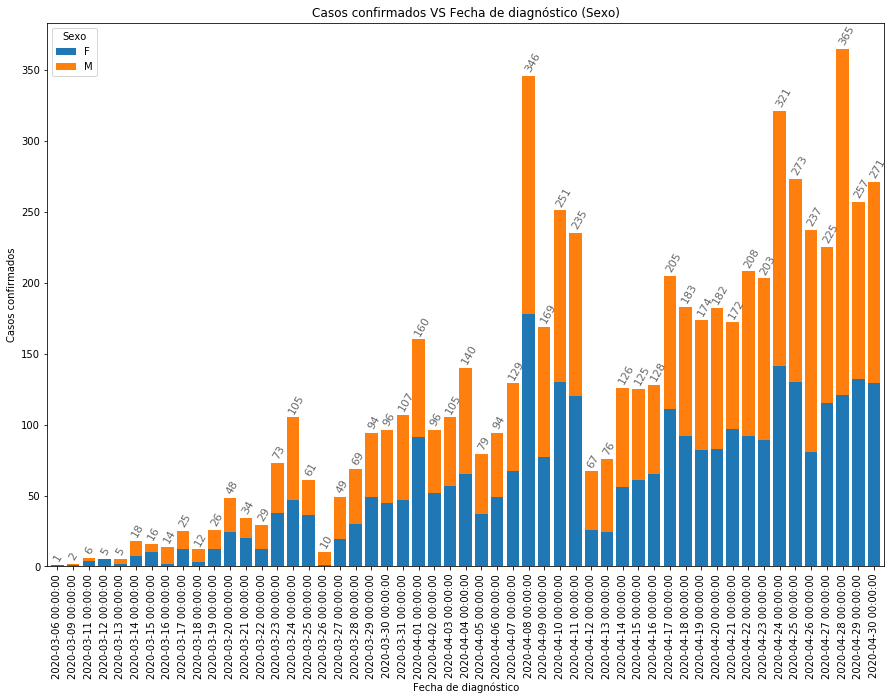

In [15]:
ax = data.groupby([ 'Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [16]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,1,1,0,0,0,0,0
2020-03-11,0,0,4,0,0,1,0,0,1,0
2020-03-12,0,0,0,1,1,1,1,1,0,0
2020-03-13,0,0,1,0,2,0,2,0,0,0
2020-03-14,0,1,7,1,1,4,0,4,0,0
2020-03-15,0,0,6,2,4,2,2,0,0,0
2020-03-16,0,1,5,5,0,2,1,0,0,0
2020-03-17,1,2,4,5,5,7,0,1,0,0


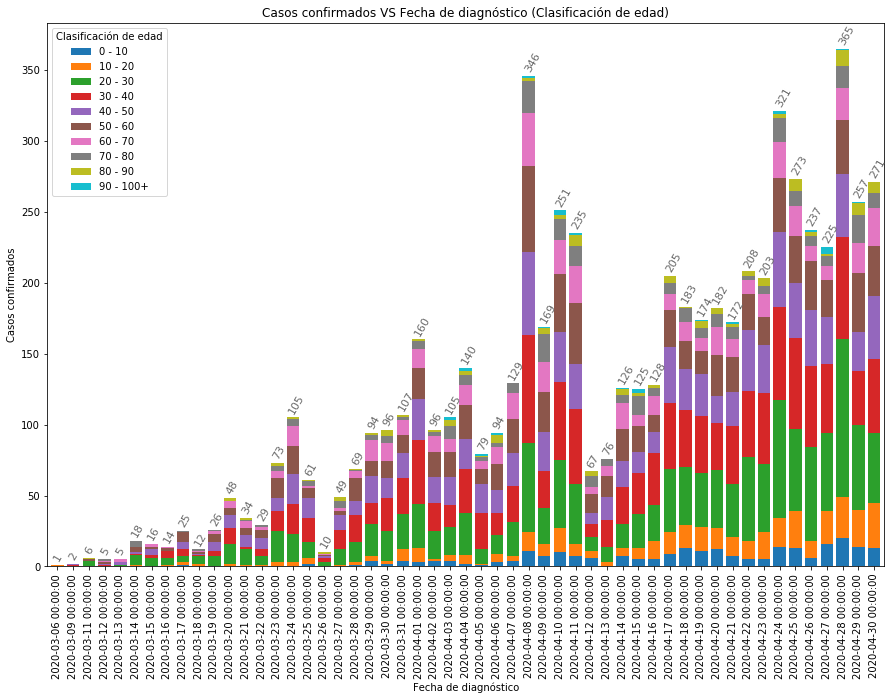

In [17]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [18]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,2.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,6.0
2020-03-12,0.0,0.0,0.0,0.0,0.0,5.0
2020-03-13,1.0,0.0,0.0,0.0,0.0,4.0
2020-03-14,0.0,0.0,0.0,0.0,0.0,18.0
2020-03-15,1.0,0.0,0.0,0.0,0.0,15.0
2020-03-16,0.0,1.0,0.0,0.0,0.0,13.0
2020-03-17,2.0,0.0,0.0,0.0,0.0,23.0


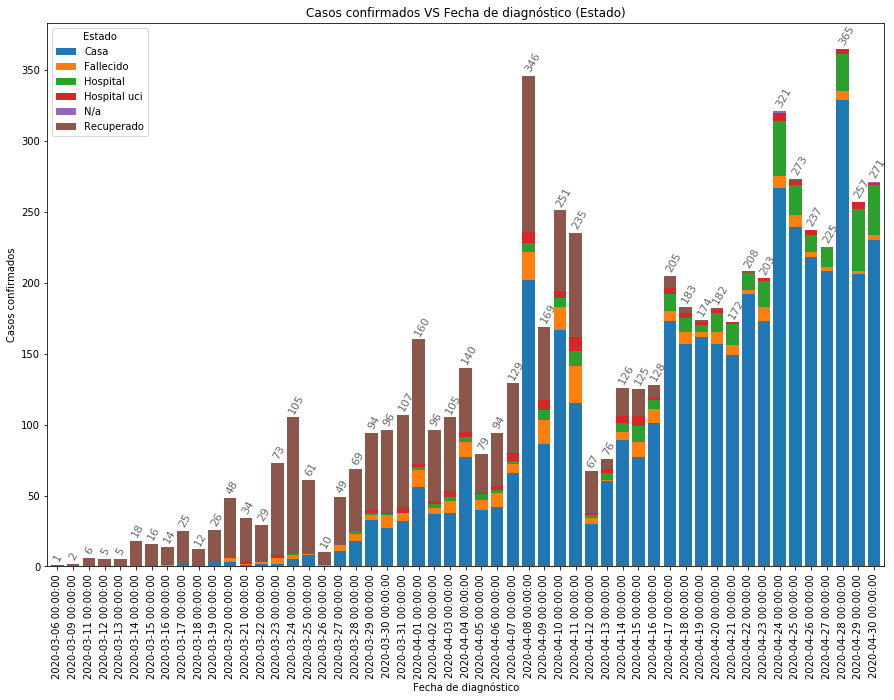

In [19]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Estado (Sexo)

In [20]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,2065,2228
Fallecido,111,182
Hospital,128,234
Hospital uci,43,75
N/a,1,1
Recuperado,729,710


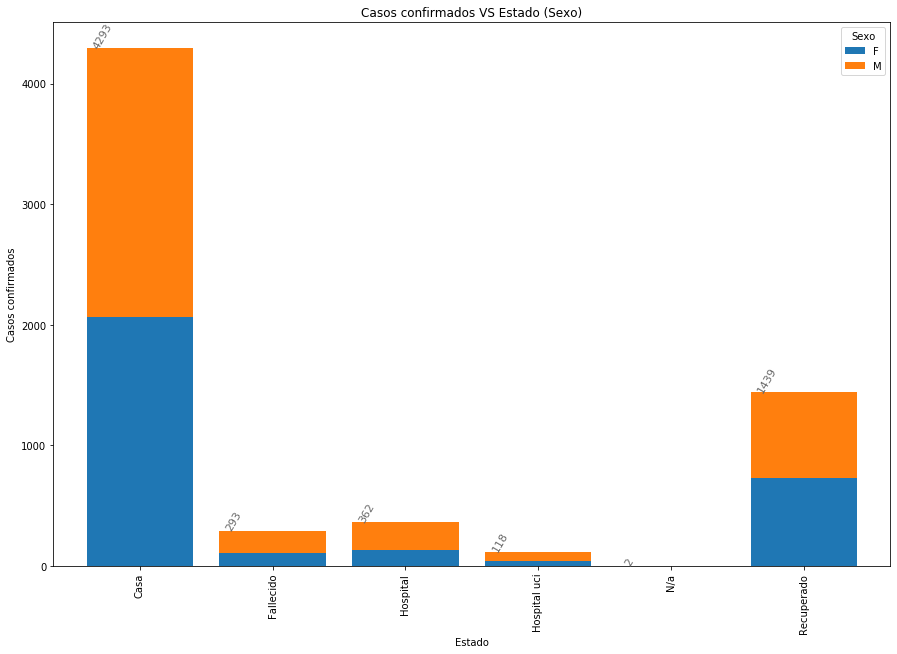

In [21]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [22]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,197,343,1031,1016,678,570,273,129,47,9
Fallecido,2,2,6,14,26,37,79,76,37,14
Hospital,12,5,32,53,56,69,59,50,21,5
Hospital uci,0,3,10,6,15,26,32,19,7,0
N/a,0,1,0,1,0,0,0,0,0,0
Recuperado,40,74,345,303,261,229,115,52,19,1


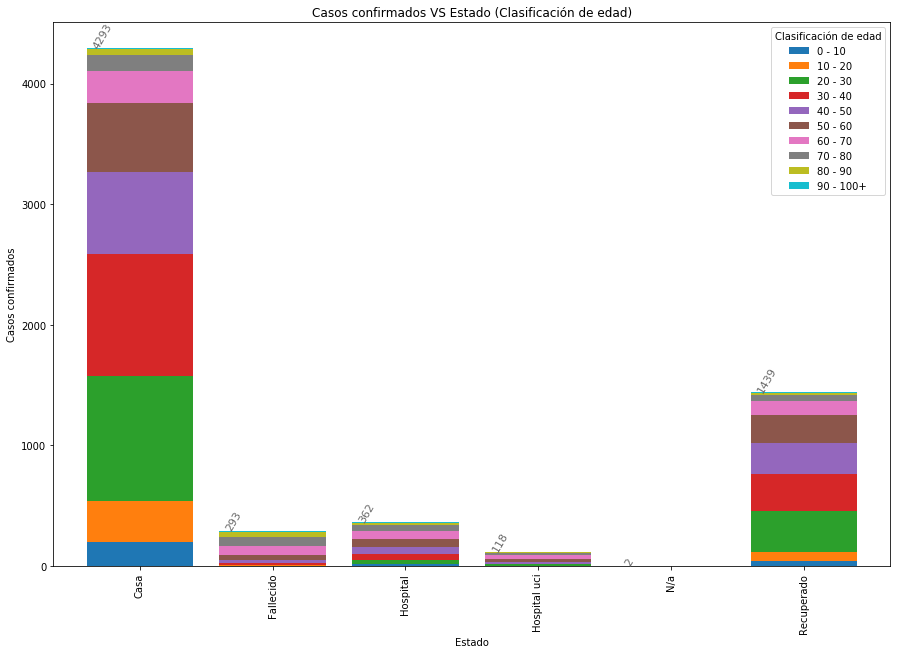

In [23]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [24]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,1773,1759
Importado,386,432
Relacionado,918,1239


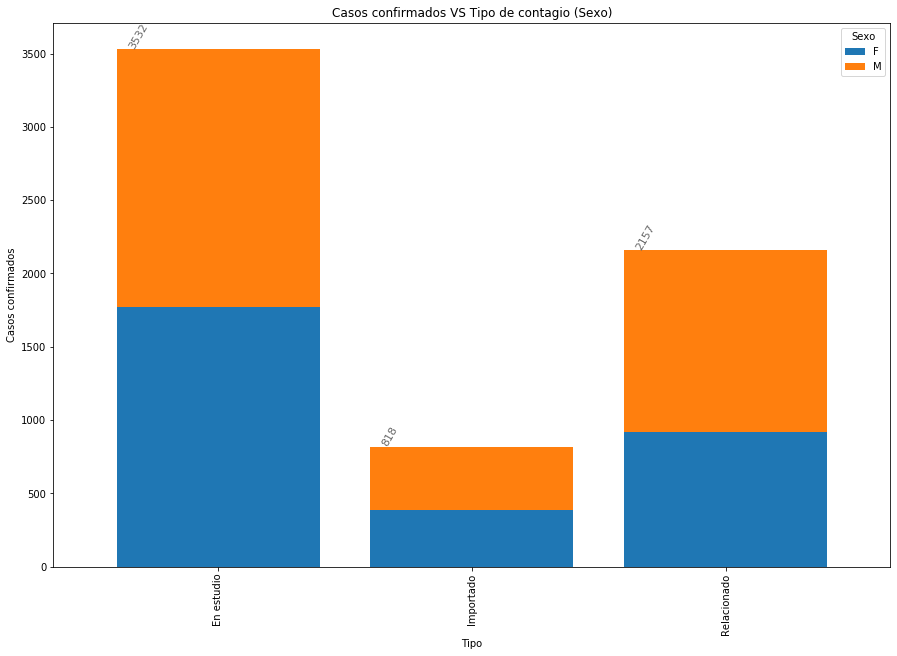

In [25]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [26]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,153,243,702,695,548,529,324,223,91,24
Importado,3,27,196,187,142,133,90,31,9,0
Relacionado,95,158,526,511,346,269,144,72,31,5


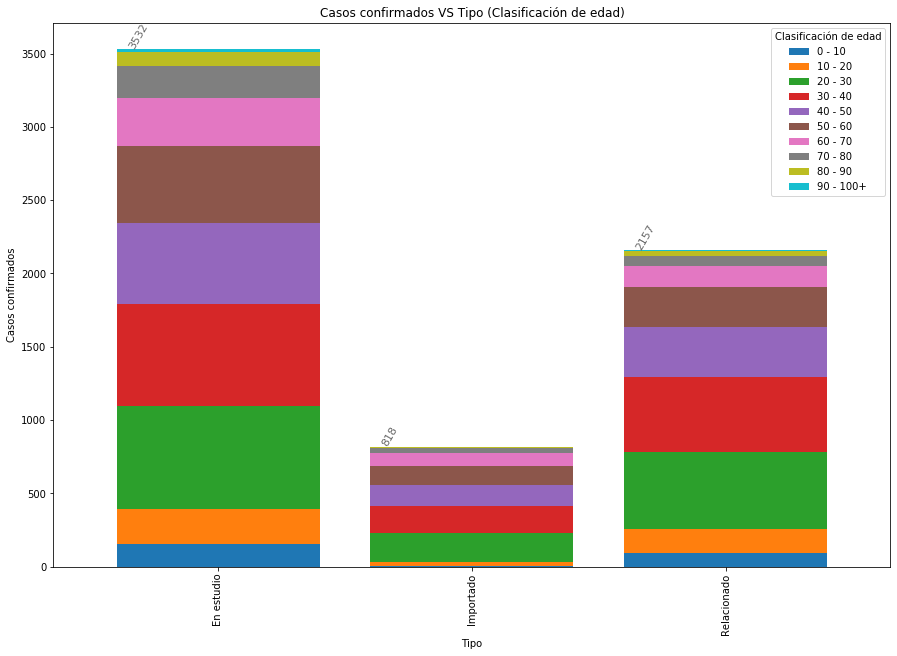

In [27]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [28]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,113,138
10 - 20,213,215
20 - 30,683,741
30 - 40,667,726
40 - 50,498,538
50 - 60,416,515
60 - 70,249,309
70 - 80,143,183
80 - 90,71,60


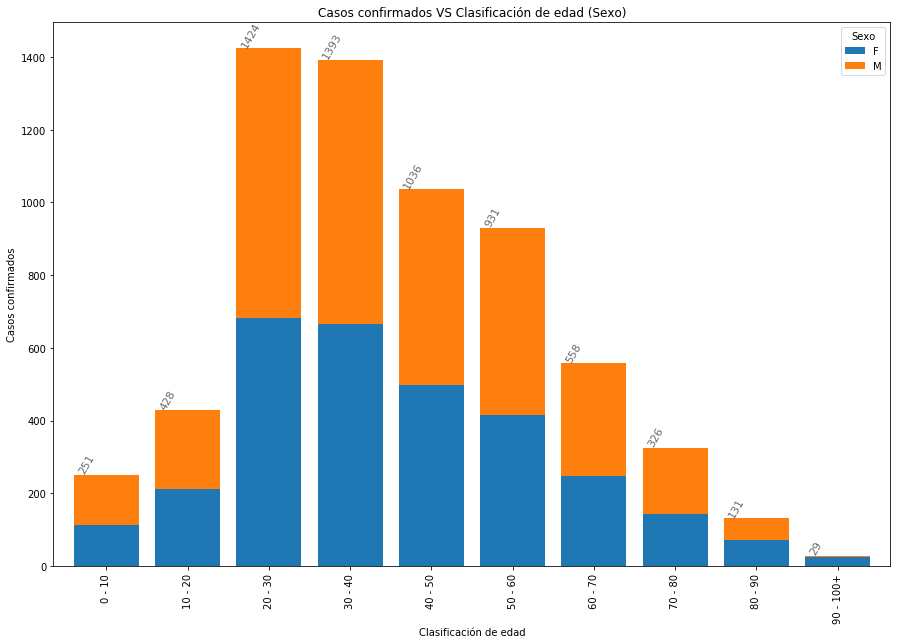

In [29]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [30]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Clasificación de edad,,,,,,
0 - 10,197,2,12,0,0,40
10 - 20,343,2,5,3,1,74
20 - 30,1031,6,32,10,0,345
30 - 40,1016,14,53,6,1,303
40 - 50,678,26,56,15,0,261
50 - 60,570,37,69,26,0,229
60 - 70,273,79,59,32,0,115
70 - 80,129,76,50,19,0,52
80 - 90,47,37,21,7,0,19


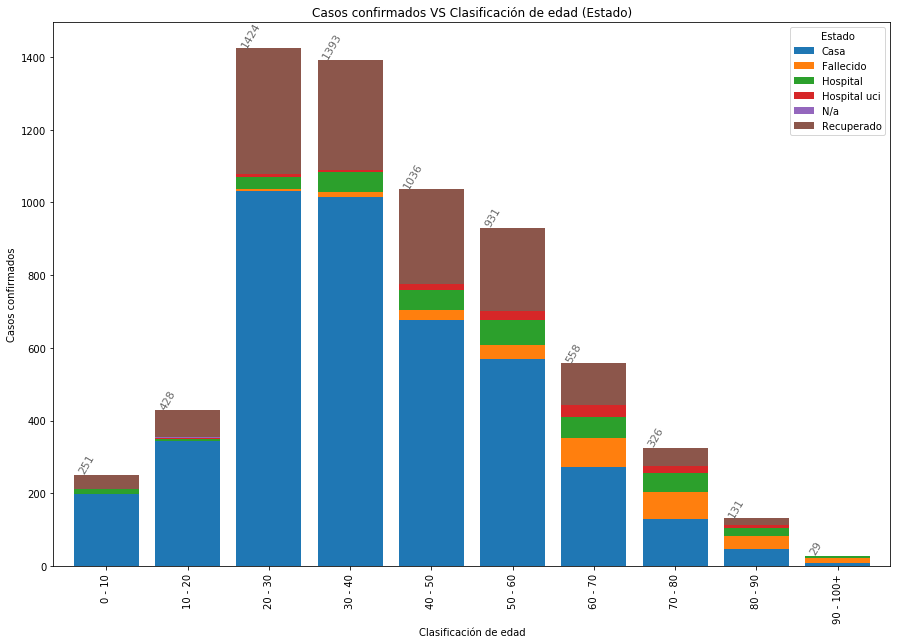

In [31]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,2.0,1.0
2020-03-11,6.0,3.0
2020-03-12,11.0,3.0
2020-03-13,13.0,6.0
2020-03-14,20.0,17.0
2020-03-15,30.0,23.0
2020-03-16,32.0,35.0
2020-03-17,44.0,48.0


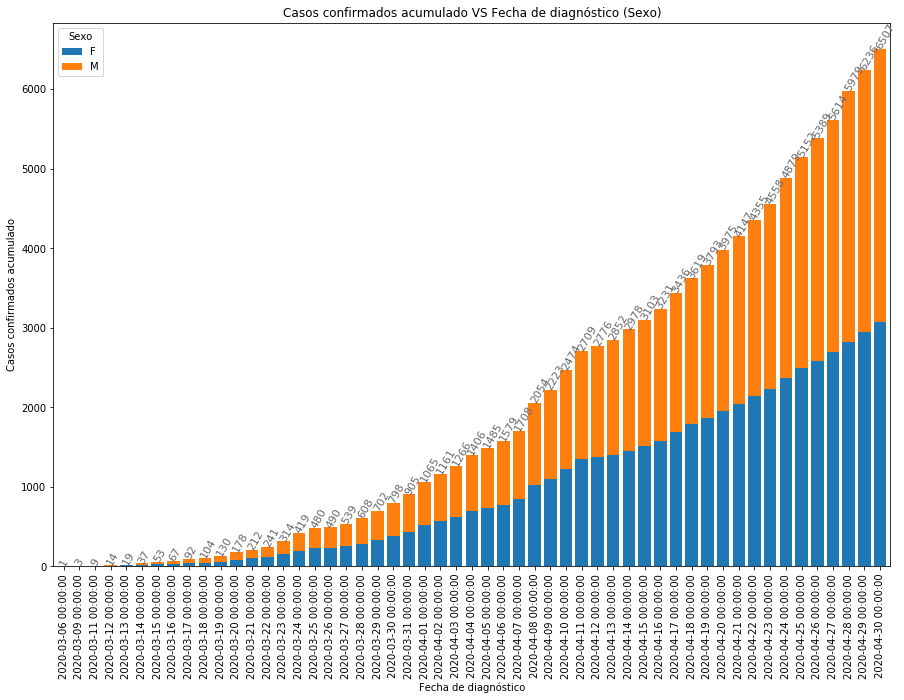

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,1,0,1,1,0,0,0,0,0
2020-03-11,0,1,4,1,1,1,0,0,1,0
2020-03-12,0,1,4,2,2,2,1,1,1,0
2020-03-13,0,1,5,2,4,2,3,1,1,0
2020-03-14,0,2,12,3,5,6,3,5,1,0
2020-03-15,0,2,18,5,9,8,5,5,1,0
2020-03-16,0,3,23,10,9,10,6,5,1,0
2020-03-17,1,5,27,15,14,17,6,6,1,0


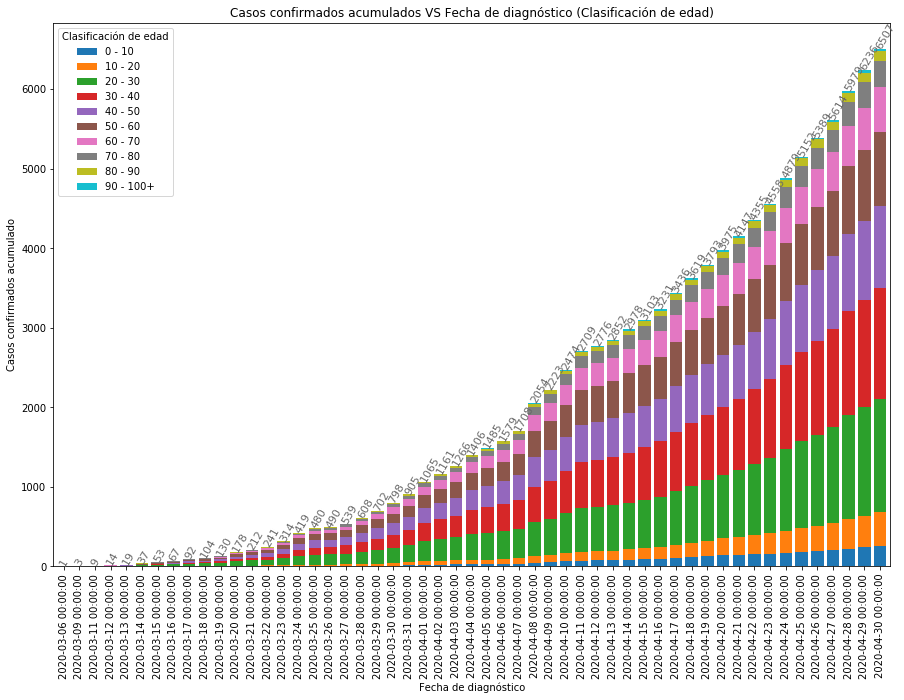

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,3.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,9.0
2020-03-12,0.0,0.0,0.0,0.0,0.0,14.0
2020-03-13,1.0,0.0,0.0,0.0,0.0,18.0
2020-03-14,1.0,0.0,0.0,0.0,0.0,36.0
2020-03-15,2.0,0.0,0.0,0.0,0.0,51.0
2020-03-16,2.0,1.0,0.0,0.0,0.0,64.0
2020-03-17,4.0,1.0,0.0,0.0,0.0,87.0


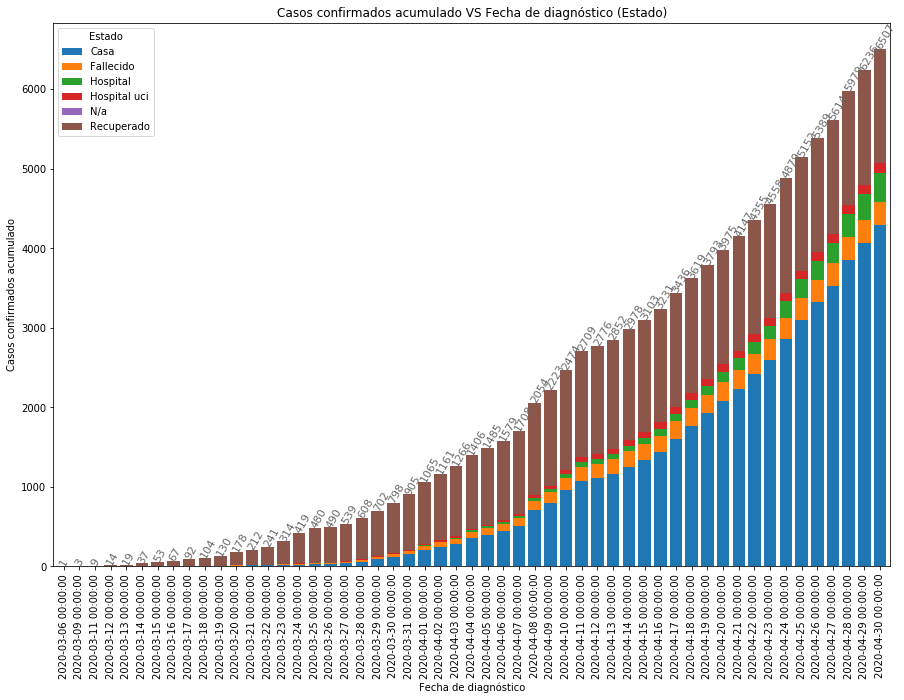

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>